# PAP C Kelompok 6

Tugas Group Project 2 :Klasifikasi

Impelementasi dan Eksperimen Prediksi Jenis Kejahatan menggunakan Python untuk Data 
Kejahatan di Los Angeles 

Anggota Kelompok:

1. Arif (5026221104)
2. Jasmine (5026221107)
3. Dicky (5026221036)
4. Affan (5026221134)

## Pemilihan Data

Tujuan: Membagi data yang sudah disiapkan dalam TGP #1 menjadi data pelatihan dan data tes.

In [2]:
#importing dependable
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedKFold, RepeatedStratifiedKFold, ShuffleSplit, StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.pipeline import make_pipeline

# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [3]:
#Load dataset
crime = pd.read_csv('Cleaned_Crime_Data.csv')
crime.head()

,Date Rptd,AREA,AREA NAME,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,...,Geographic_Zone,Female,Male,Unknown gender,Adult Arrest,Adult Other,Invest Cont,Juv Arrest,Juv Other,UNK
0,03/01/2020 12:00:00 AM,7,Wilshire,1,510,VEHICLE - STOLEN,NaN,37,M,O,...,Zone 1,False,True,False,True,False,False,False,False,False
1,02/09/2020 12:00:00 AM,1,Central,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,...,Zone 1,False,True,False,False,False,True,False,False,False
2,11/11/2020 12:00:00 AM,3,Southwest,1,480,BIKE - STOLEN,0344 1251,19,X,X,...,Zone 1,False,False,True,False,False,True,False,False,False
3,05/10/2023 12:00:00 AM,9,Van Nuys,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,...,Zone 2,False,True,False,False,False,True,False,False,False
4,08/18/2022 12:00:00 AM,6,Hollywood,2,354,THEFT OF IDENTITY,1822 1501 0930 2004,28,M,H,...,Zone 1,False,True,False,False,False,True,False,False,False


In [4]:
# Periksa missing value
crime.isnull().sum()

Date Rptd               0
AREA                    0
AREA NAME               0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            142255
Vict Age                0
Vict Sex                0
Vict Descent            0
Premis Cd              15
Premis Desc           576
Weapon Used Cd     607445
Weapon Desc        607445
Status                  1
Crm Cd 1               11
LOCATION                0
Cross Street       764739
LAT                     0
LON                     0
TIME OCC_str            0
DATETIME OCC            0
day_of_week             0
month                   0
Day_Night               0
Geographic_Zone         0
Female                  0
Male                    0
Unknown gender          0
Adult Arrest            0
Adult Other             0
Invest Cont             0
Juv Arrest              0
Juv Other               0
UNK                     0
dtype: int64

In [5]:
dt = crime.copy()

In [6]:
# isi missing value kolom weapon used dengan code 500 dan deskripsi UNKNOWN WEAPON/OTHER WEAPON
# nilai yang kosong dalam weapon used mungkin dikarenakan senjata yang digunakan pelaku tidak diketahui

dt.fillna({'Weapon Used Cd':500}, inplace=True)
dt.fillna({'Weapon Desc':'UNKNOWN WEAPON/OTHER WEAPON'}, inplace=True)

In [7]:
# isi missing value kolom mocodes dengan modus
mocodes_modus = dt['Mocodes'].value_counts().idxmax()
dt.fillna({'Mocodes':mocodes_modus}, inplace=True)
dt.isnull().sum()

Date Rptd               0
AREA                    0
AREA NAME               0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes                 0
Vict Age                0
Vict Sex                0
Vict Descent            0
Premis Cd              15
Premis Desc           576
Weapon Used Cd          0
Weapon Desc             0
Status                  1
Crm Cd 1               11
LOCATION                0
Cross Street       764739
LAT                     0
LON                     0
TIME OCC_str            0
DATETIME OCC            0
day_of_week             0
month                   0
Day_Night               0
Geographic_Zone         0
Female                  0
Male                    0
Unknown gender          0
Adult Arrest            0
Adult Other             0
Invest Cont             0
Juv Arrest              0
Juv Other               0
UNK                     0
dtype: int64

In [8]:
# drop kolom Cross Street & Date Rptd
dt = dt.drop('Cross Street', axis=1)
dt = dt.drop('Date Rptd', axis=1)

In [9]:
# drop baris yang memiliki null value
dt.dropna(axis=0, inplace=True)
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 907917 entries, 0 to 908503
Data columns (total 33 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   AREA             907917 non-null  int64  
 1   AREA NAME        907917 non-null  object 
 2   Part 1-2         907917 non-null  int64  
 3   Crm Cd           907917 non-null  int64  
 4   Crm Cd Desc      907917 non-null  object 
 5   Mocodes          907917 non-null  object 
 6   Vict Age         907917 non-null  int64  
 7   Vict Sex         907917 non-null  object 
 8   Vict Descent     907917 non-null  object 
 9   Premis Cd        907917 non-null  float64
 10  Premis Desc      907917 non-null  object 
 11  Weapon Used Cd   907917 non-null  float64
 12  Weapon Desc      907917 non-null  object 
 13  Status           907917 non-null  object 
 14  Crm Cd 1         907917 non-null  float64
 15  LOCATION         907917 non-null  object 
 16  LAT              907917 non-null  float64
 

In [10]:
dt_filtered = dt.drop(['AREA NAME', 'Part 1-2', 'Crm Cd Desc',
                       'Premis Desc', 'Weapon Desc', 'DATETIME OCC'], axis=1)
dt_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 907917 entries, 0 to 908503
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   AREA             907917 non-null  int64  
 1   Crm Cd           907917 non-null  int64  
 2   Mocodes          907917 non-null  object 
 3   Vict Age         907917 non-null  int64  
 4   Vict Sex         907917 non-null  object 
 5   Vict Descent     907917 non-null  object 
 6   Premis Cd        907917 non-null  float64
 7   Weapon Used Cd   907917 non-null  float64
 8   Status           907917 non-null  object 
 9   Crm Cd 1         907917 non-null  float64
 10  LOCATION         907917 non-null  object 
 11  LAT              907917 non-null  float64
 12  LON              907917 non-null  float64
 13  TIME OCC_str     907917 non-null  object 
 14  day_of_week      907917 non-null  object 
 15  month            907917 non-null  object 
 16  Day_Night        907917 non-null  object 
 

In [11]:
dt_filtered['Mocodes'].value_counts()

Mocodes
0344                                       180045
0329                                        19672
1822 0344                                   12593
0325                                         9610
1501                                         8950
                                            ...  
0344 1402 1822 1602 1309 0326 1414              1
1822 0319 0416 0446 0903 1507 2054 1536         1
1100 1419 0450                                  1
0910 0416 2004 1266                             1
0400 1822 1310 0416                             1
Name: count, Length: 282026, dtype: int64

In [12]:
dt_filtered['Mocodes'] = dt_filtered['Mocodes'].str[:4]
dt_filtered['Mocodes'].value_counts()

Mocodes
0344    264340
1822    116656
0329     59846
0913     45586
2000     33991
         ...  
1523         1
0437         1
0523         1
0530         1
4024         1
Name: count, Length: 627, dtype: int64

In [13]:
dt_filtered['Vict Sex'].value_counts()

Vict Sex
M    495361
F    319980
X     92473
H       102
-         1
Name: count, dtype: int64

In [14]:
dt_filtered = dt_filtered.drop('Vict Sex', axis=1)

In [15]:
dt_filtered['Vict Descent'].value_counts()

Vict Descent
H    409125
W    171070
B    121886
X    100866
O     69123
A     18094
K      5021
F      4180
C      4033
J      1296
V      1077
I       918
Z       498
P       254
U       201
D        85
G        69
L        68
S        51
-         2
Name: count, dtype: int64

In [16]:
dt_filtered['Status'].value_counts()

Status
IC    726527
AO     98323
AA     78386
JA      3006
JO      1671
CC         4
Name: count, dtype: int64

In [17]:
dt_filtered['TIME OCC_str'].value_counts()

TIME OCC_str
12:00    29904
18:00    23991
17:00    22625
20:00    22609
22:00    21118
         ...  
22:51       26
23:32       25
05:34       25
05:59       21
05:31       17
Name: count, Length: 1439, dtype: int64

In [18]:
dt_filtered['day_of_week'].value_counts()

day_of_week
Friday       138685
Saturday     133800
Wednesday    128448
Thursday     127847
Monday       127664
Sunday       127256
Tuesday      124217
Name: count, dtype: int64

In [19]:
dt_filtered['month'].value_counts()

month
January      85590
March        81069
February     79980
July         77933
August       77569
April        77404
May          77056
June         75368
October      70803
September    70532
December     68154
November     66459
Name: count, dtype: int64

In [20]:
dt_filtered['Day_Night'].value_counts()

Day_Night
Day      501926
Night    405991
Name: count, dtype: int64

In [21]:
dt_filtered['Geographic_Zone'].value_counts()

Geographic_Zone
Zone 1    321690
Zone 2    308997
Zone 3    277230
Name: count, dtype: int64

In [22]:
dt_filtered['LOCATION'].value_counts()

LOCATION
800 N  ALAMEDA                      ST      2358
700 S  FIGUEROA                     ST      1586
10200    SANTA MONICA                 BL    1547
100    THE GROVE                    DR      1544
6TH                          ST             1484
                                            ... 
LA CLEDE                     ST                1
11200    DULCET                       AV       1
400    SHERMAN CANAL                CT         1
6900    PASEO DEL SERRA                        1
1800 E  MARTIN LUTHER KING JR        BL        1
Name: count, Length: 64424, dtype: int64

In [23]:
dt_filtered = dt_filtered.drop('LOCATION', axis=1)

In [24]:
dt_transformed = dt_filtered
dt_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 907917 entries, 0 to 908503
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   AREA             907917 non-null  int64  
 1   Crm Cd           907917 non-null  int64  
 2   Mocodes          907917 non-null  object 
 3   Vict Age         907917 non-null  int64  
 4   Vict Descent     907917 non-null  object 
 5   Premis Cd        907917 non-null  float64
 6   Weapon Used Cd   907917 non-null  float64
 7   Status           907917 non-null  object 
 8   Crm Cd 1         907917 non-null  float64
 9   LAT              907917 non-null  float64
 10  LON              907917 non-null  float64
 11  TIME OCC_str     907917 non-null  object 
 12  day_of_week      907917 non-null  object 
 13  month            907917 non-null  object 
 14  Day_Night        907917 non-null  object 
 15  Geographic_Zone  907917 non-null  object 
 16  Female           907917 non-null  bool   
 

In [25]:
dt_transformed['Mocodes'] = dt_transformed['Mocodes'].astype(int)

In [26]:
# Factorize the column to get unique integers and mapping
codes, unique_values = pd.factorize(dt_transformed['Vict Descent'])
dt_transformed['Vict Descent'] = codes

# Create a dictionary to map integers back to original values
value_mapping = {index: value for index, value in enumerate(unique_values)}

print(value_mapping)

{0: 'O', 1: 'X', 2: 'H', 3: 'B', 4: 'W', 5: 'A', 6: 'K', 7: 'C', 8: 'J', 9: 'F', 10: 'I', 11: 'V', 12: 'S', 13: 'P', 14: 'Z', 15: 'G', 16: 'U', 17: 'D', 18: 'L', 19: '-'}


In [27]:
dt_transformed['Vict Descent'].value_counts()

Vict Descent
2     409125
4     171070
3     121886
1     100866
0      69123
5      18094
6       5021
9       4180
7       4033
8       1296
11      1077
10       918
14       498
13       254
16       201
17        85
15        69
18        68
12        51
19         2
Name: count, dtype: int64

In [28]:
dt_transformed['Status'] = dt_transformed['Status'].replace(
    {'AA': 0 , 'AO': 1 ,
     'CC': 2 , 'IC': 3 ,
     'JA': 4 , 'JO': 5 ,}
)
dt_transformed['Status'].value_counts()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_37816\2535787978.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dt_transformed['Status'] = dt_transformed['Status'].replace(


Status
3    726527
1     98323
0     78386
4      3006
5      1671
2         4
Name: count, dtype: int64

In [29]:
dt_transformed['day_of_week'] = dt_transformed['day_of_week'].replace(
    {'Sunday': 0 , 
     'Monday': 1 ,
     'Tuesday': 2 , 
     'Wednesday': 3 ,
     'Thursday': 4 ,
     'Friday': 5 ,
     'Saturday': 6
     }
)
dt_transformed['day_of_week'].value_counts()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_37816\2590316595.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dt_transformed['day_of_week'] = dt_transformed['day_of_week'].replace(


day_of_week
5    138685
6    133800
3    128448
4    127847
1    127664
0    127256
2    124217
Name: count, dtype: int64

In [30]:
dt_transformed['month'] = dt_transformed['month'].replace(
    {'January': 0 , 
     'February': 1 ,
     'March': 2 , 
     'April': 3 ,
     'May': 4 ,
     'June': 5 ,
     'July': 6,
     'August': 7 , 
     'September': 8 ,
     'October': 9 , 
     'November': 10 ,
     'December': 11
     }
)
dt_transformed['month'].value_counts()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_37816\1795459436.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dt_transformed['month'] = dt_transformed['month'].replace(


month
0     85590
2     81069
1     79980
6     77933
7     77569
3     77404
4     77056
5     75368
9     70803
8     70532
11    68154
10    66459
Name: count, dtype: int64

In [31]:
dt_transformed['Day_Night'] = dt_transformed['Day_Night'].replace(
    {'Day': 0 , 
     'Night': 1
     }
)
dt_transformed['Day_Night'].value_counts()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_37816\3108096912.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dt_transformed['Day_Night'] = dt_transformed['Day_Night'].replace(


Day_Night
0    501926
1    405991
Name: count, dtype: int64

In [32]:
dt_transformed['Geographic_Zone'] = dt_transformed['Geographic_Zone'].replace(
    {'Zone 1': 0 , 
     'Zone 2': 1,
     'Zone 3': 2
     }
)
dt_transformed['Geographic_Zone'].value_counts()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_37816\3481773240.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dt_transformed['Geographic_Zone'] = dt_transformed['Geographic_Zone'].replace(


Geographic_Zone
0    321690
1    308997
2    277230
Name: count, dtype: int64

In [33]:
dt_transformed['TIME OCC_str'] = dt_transformed['TIME OCC_str'].str.replace(':', '').astype(int)
dt_transformed['TIME OCC_str'].value_counts()

TIME OCC_str
1200    29904
1800    23991
1700    22625
2000    22609
2200    21118
        ...  
2251       26
2332       25
534        25
559        21
531        17
Name: count, Length: 1439, dtype: int64

In [34]:
dt_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 907917 entries, 0 to 908503
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   AREA             907917 non-null  int64  
 1   Crm Cd           907917 non-null  int64  
 2   Mocodes          907917 non-null  int32  
 3   Vict Age         907917 non-null  int64  
 4   Vict Descent     907917 non-null  int64  
 5   Premis Cd        907917 non-null  float64
 6   Weapon Used Cd   907917 non-null  float64
 7   Status           907917 non-null  int64  
 8   Crm Cd 1         907917 non-null  float64
 9   LAT              907917 non-null  float64
 10  LON              907917 non-null  float64
 11  TIME OCC_str     907917 non-null  int32  
 12  day_of_week      907917 non-null  int64  
 13  month            907917 non-null  int64  
 14  Day_Night        907917 non-null  int64  
 15  Geographic_Zone  907917 non-null  int64  
 16  Female           907917 non-null  bool   
 

### Feature Selection

<Axes: >

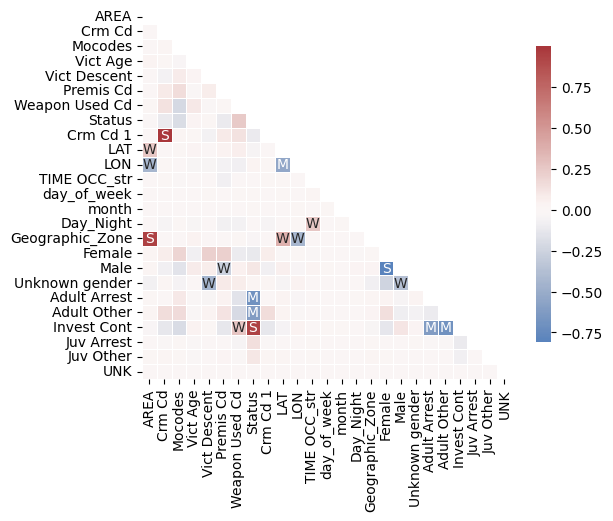

In [35]:
# visualize Correlation plot
corr = dt_transformed.corr('spearman')
sns.heatmap(corr,
            annot = np.where(np.abs(corr)>0.75,'S', # correlation more than +/- 75% labelled as 'STRONG CORRELATION'
                      np.where(np.abs(corr)>0.5,'M', # correlation more than +/- 50% labelled as 'MEDIUM CORRELATION'
                           np.where(np.abs(corr)>0.25,'W',''))), # correlation more than +/- 25% labelled as 'WEAK CORRELATION'
            mask=np.triu(np.ones_like(corr, dtype=bool)),
            square=True,
            center=0,fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8}
            )

Dari correlation plot diatas, dapat ditemukan 2 variabel yang memiliki hubungan S (Strong) yaitu

AREA dengan Geographic Zone

Crm Cd dengan Crm Cd 1

Status dengan Invest Cont

Female dengan Male

Pada hubungan Status dengan Invest cont cukup menarik karena Adult Other dan Adult Arrest memiliki hubungan M (Medium) dengan kedua variabel tersebut

In [36]:
corr[['Status','Invest Cont','Adult Arrest','Adult Other']]

,Status,Invest Cont,Adult Arrest,Adult Other
AREA,-0.026600,-0.031588,0.015365,0.023745
Crm Cd,-0.114838,-0.125517,0.003735,0.158904
Mocodes,-0.188591,-0.197844,0.100531,0.160918
Vict Age,0.028976,0.042402,-0.020360,-0.027035
Vict Descent,0.005409,0.004847,-0.039548,0.032778
Premis Cd,-0.115320,-0.126799,0.046073,0.117428
Weapon Used Cd,0.247638,0.269899,-0.146344,-0.202971
Status,1.000000,0.942495,-0.698033,-0.622772
Crm Cd 1,-0.114415,-0.125054,0.003429,0.158612
LAT,-0.052167,-0.054748,0.038042,0.034236


Dari tabel korelasi diatas, ditemukan bahwa Status, Invest Cont, Adult Arrest, dan Adult Other memang memiliki korelasi 
yang kuat

Setelah menemukan korelasi yang kuat antar variabel, kami akan mengambil salah satu dari variabel-variabel yang berhubungan kuat untuk
diproses model. Variabel yang akan diambil adalah variabel yang memiliki koralasi yang besar terhadap variabel tujuan (Crm Cd)

In [37]:
corr.sort_values('Crm Cd', ascending=False, key=abs)['Crm Cd']

Crm Cd             1.000000
Crm Cd 1           0.999458
Adult Other        0.158904
Weapon Used Cd     0.125788
Invest Cont       -0.125517
Status            -0.114838
Premis Cd          0.093281
Male              -0.087629
Female             0.076910
Vict Descent      -0.064160
Day_Night         -0.046602
Juv Other          0.022855
Unknown gender     0.022769
Mocodes            0.021851
Juv Arrest        -0.021238
day_of_week       -0.008195
TIME OCC_str       0.006814
Vict Age           0.006466
LON                0.006178
month             -0.004218
Adult Arrest       0.003735
LAT                0.001056
UNK               -0.000808
AREA              -0.000384
Geographic_Zone    0.000297
Name: Crm Cd, dtype: float64

* Di antara Crm Cd dengan Crm Cd 1 tentu Crm Cd memiliki nilai yang lebih besar, sehingga Crm Cd 1 dapat di-ignore
* Di antara Area dengan Geographic Zone, AREA memiliki nilai yang lebih besar, sehingga Geographic Zone dapat di-ignore
* Di antara Status dan Invest Cont, Invest Cont memiliki nilai yang lebih besar namun lebih kecil dari Adult Other, sehingga Status dan Adult Arrest
dapat di-ignore
* Di antara Female dan Male, Male memiliki nilai yang lebih besar, sehingga Female dapat di-ignore

In [38]:
dt_selected = dt_transformed.drop(['Crm Cd 1', 'Geographic_Zone', 'Status', 'Adult Arrest', 'Female'], axis=1)
dt_selected.head()

,AREA,Crm Cd,Mocodes,Vict Age,Vict Descent,Premis Cd,Weapon Used Cd,LAT,LON,TIME OCC_str,day_of_week,month,Day_Night,Male,Unknown gender,Adult Other,Invest Cont,Juv Arrest,Juv Other,UNK
0,7,510,344,37,0,101.0,500.0,34.0375,-118.3506,2130,0,2,1,True,False,False,False,False,False,False
1,1,330,1822,47,0,128.0,500.0,34.0444,-118.2628,1800,6,1,0,True,False,False,True,False,False,False
2,3,480,344,19,1,502.0,500.0,34.0210,-118.3002,1700,3,10,0,False,True,False,True,False,False,False
3,9,343,325,19,0,405.0,500.0,34.1576,-118.4387,2037,2,2,1,True,False,False,True,False,False,False
4,6,354,1822,28,2,102.0,500.0,34.0944,-118.3277,1200,1,7,0,True,False,False,True,False,False,False


In [39]:
# habus stored dataframe yang tidak diperlukan untuk meringankan kinerja laptop
del dt, dt_filtered, dt_transformed, crime

### Data Balancing

Sebelum dilakukan training, perlu dilakukan data balancing terlebih dahulu, dimana kita akan menyetarakan variabel tujuan (yang nantinya akan dijadikan bahan training) agar ketika model ditraining, hasil tidak skew/condong ke salah satu hasil.

In [40]:
dt_selected['Crm Cd'].value_counts()

Crm Cd
510    109005
624     66891
330     57833
740     55426
354     54615
        ...  
884         4
906         4
445         4
926         1
453         1
Name: count, Length: 140, dtype: int64

Berdasarkan data diatas, apabila kami melakukan data balancing dengan oversampling maka data yang diproses akan menjadi sangat banyak dan sulit untuk diproses. oleh karena itu kelompok kami memilih untuk membatasi sample size diangka 5000 row untuk setiap kelas yang akan diprediksi

In [41]:
X = dt_selected.drop('Crm Cd', axis=1)
y = dt_selected['Crm Cd']

In [42]:
balancer = RandomOverSampler(random_state=42)
X_balanced, y_balanced = balancer.fit_resample(X, y)
y_balanced.value_counts()

Crm Cd
510    109005
931    109005
441    109005
444    109005
670    109005
        ...  
352    109005
625    109005
940    109005
815    109005
453    109005
Name: count, Length: 140, dtype: int64

In [43]:
# Initialize temporary variables to hold the samples
temp_X = pd.DataFrame()
temp_y = pd.Series(dtype=int)

# Untuk setiap kelas, ambil 5000 row
for class_label in y_balanced.unique():
    class_X = X_balanced[y_balanced == class_label]
    class_y = y_balanced[y_balanced == class_label]

    n_samples = min(len(class_X), 5000)  # Jumlah sampel yang diambil
    sampled_X = class_X.sample(n=n_samples, random_state=42)
    sampled_y = class_y.sample(n=n_samples, random_state=42)

    temp_X = pd.concat([temp_X, sampled_X], ignore_index=True)
    temp_y = pd.concat([temp_y, sampled_y], ignore_index=True)

X_balanced = temp_X
y_balanced = temp_y

del temp_X, temp_y

print(y_balanced.value_counts())

510    1000
931    1000
441    1000
444    1000
670    1000
       ... 
352    1000
625    1000
940    1000
815    1000
453    1000
Name: count, Length: 140, dtype: int64


In [44]:
X_balanced.head(15)

,AREA,Mocodes,Vict Age,Vict Descent,Premis Cd,Weapon Used Cd,LAT,LON,TIME OCC_str,day_of_week,month,Day_Night,Male,Unknown gender,Adult Other,Invest Cont,Juv Arrest,Juv Other,UNK
0,13,344,37,2,101.0,500.0,34.0146,-118.2781,2330,0,5,1,True,False,False,True,False,False,False
1,7,344,37,2,108.0,500.0,34.0853,-118.3753,1400,3,11,0,True,False,False,True,False,False,False
2,19,344,37,2,101.0,500.0,34.2839,-118.4560,20,1,7,1,True,False,False,True,False,False,False
3,7,344,37,2,101.0,500.0,34.0362,-118.3284,1600,6,7,0,True,False,False,True,False,False,False
4,20,344,37,2,108.0,500.0,34.0545,-118.2941,1900,4,6,1,True,False,False,True,False,False,False
5,9,344,37,2,101.0,500.0,34.1938,-118.4702,1400,0,1,0,True,False,False,True,False,False,False
6,1,344,37,2,101.0,500.0,34.0509,-118.2515,45,3,6,1,True,False,False,True,False,False,False
7,4,344,37,2,101.0,500.0,34.0336,-118.2140,1,6,9,1,True,False,False,True,False,False,False
8,17,344,37,2,101.0,500.0,34.2709,-118.5954,500,5,2,1,True,False,False,True,False,False,False
9,13,344,37,2,101.0,500.0,34.0216,-118.2531,1400,4,5,0,True,False,False,True,False,False,False


### Data Splitting - 5-fold cross validation

In [45]:
# split dataset 30% untuk test
X_train_main, X_test_main, y_train_main, y_test_main = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=130, stratify=y_balanced)

In [46]:
# Menghitung jumlah masing-masing kelas
class_counts = y_train_main.value_counts()
print(class_counts)
print("mean "+class_counts.mean().astype(str))
print("standar deviasi "+class_counts.std().astype(str))

906    700
627    700
310    700
410    700
433    700
      ... 
450    700
870    700
880    700
924    700
910    700
Name: count, Length: 140, dtype: int64
mean 700.0
standar deviasi 0.0


Nilai Mean menunjukkan 17500 dan standar deviasi tepat nol menandakan setiap kelas pada y_train terbagi secara proposional menggunakan train_test_split()

In [47]:
# initialize Stratified KFold splitter
strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=130)

In [48]:
# 5-fold cross validation untuk data train
train_set_kfold = []
test_set_kfold = []

print('\nKFold\n')
for i, (train_index, test_index) in enumerate(strat_kfold.split(X_train_main, y_train_main)): # for strat_kfold, incl. both X and y
  print(f"Fold {i}")
  print(f"  Train: index={train_index[:5]}... ({len(train_index)} rows)")
  print(f"  Test:  index={test_index[:5]}... ({len(test_index)} rows)")
  train_set_kfold.append(train_index)
  test_set_kfold.append(test_index)


KFold

Fold 0
  Train: index=[0 1 2 5 6]... (78400 rows)
  Test:  index=[ 3  4 12 20 21]... (19600 rows)
Fold 1
  Train: index=[0 1 3 4 5]... (78400 rows)
  Test:  index=[ 2  6  9 15 16]... (19600 rows)
Fold 2
  Train: index=[0 2 3 4 5]... (78400 rows)
  Test:  index=[ 1  7  8 10 25]... (19600 rows)
Fold 3
  Train: index=[0 1 2 3 4]... (78400 rows)
  Test:  index=[13 14 17 22 30]... (19600 rows)
Fold 4
  Train: index=[1 2 3 4 6]... (78400 rows)
  Test:  index=[ 0  5 11 19 24]... (19600 rows)


In [49]:
X_balanced.iloc[train_set_kfold[0]].describe()

,AREA,Mocodes,Vict Age,Vict Descent,Premis Cd,Weapon Used Cd,LAT,LON,TIME OCC_str,day_of_week,month,Day_Night
count,78400.000000,78400.000000,78400.000000,78400.000000,78400.000000,78400.00000,78400.000000,78400.000000,78400.000000,78400.000000,78400.000000,78400.000000
mean,10.781977,1065.308916,34.274158,2.291645,335.080638,446.46773,33.979945,-118.033030,1311.030765,3.047742,5.218954,0.445217
std,6.077173,638.553459,11.894368,1.384878,222.229386,107.44213,1.772927,6.147031,665.418753,2.000926,3.439713,0.496993
min,1.000000,100.000000,12.000000,0.000000,101.000000,101.00000,0.000000,-118.667600,1.000000,0.000000,0.000000,0.000000
25%,6.000000,400.000000,26.000000,1.000000,102.000000,400.00000,34.007975,-118.426900,850.000000,1.000000,2.000000,0.000000
50%,11.000000,943.000000,37.000000,2.000000,401.000000,500.00000,34.057700,-118.318900,1355.000000,3.000000,5.000000,0.000000
75%,16.000000,1601.000000,39.000000,3.000000,502.000000,500.00000,34.166000,-118.276400,1850.000000,5.000000,8.000000,1.000000
max,21.000000,9999.000000,63.000000,19.000000,971.000000,516.00000,34.327500,0.000000,2359.000000,6.000000,11.000000,1.000000


### Feature Scaling

In [50]:
X_balanced.describe()

,AREA,Mocodes,Vict Age,Vict Descent,Premis Cd,Weapon Used Cd,LAT,LON,TIME OCC_str,day_of_week,month,Day_Night
count,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000
mean,10.724357,1060.008379,35.401421,2.254543,333.944157,454.986921,33.962520,-117.980844,1308.029679,3.117636,5.221586,0.444314
std,6.055078,637.730190,11.712269,1.406792,223.651876,98.668768,1.914822,6.640493,663.877374,1.995172,3.451875,0.496891
min,1.000000,100.000000,12.000000,0.000000,101.000000,101.000000,0.000000,-118.667600,1.000000,0.000000,0.000000,0.000000
25%,5.000000,377.000000,28.000000,1.000000,102.000000,400.000000,34.003800,-118.429200,842.000000,1.000000,2.000000,0.000000
50%,11.000000,943.000000,37.000000,2.000000,252.000000,500.000000,34.057000,-118.322200,1345.000000,3.000000,5.000000,0.000000
75%,16.000000,1501.000000,40.000000,3.000000,502.000000,500.000000,34.168200,-118.273000,1850.000000,5.000000,8.000000,1.000000
max,21.000000,9999.000000,63.000000,19.000000,971.000000,516.000000,34.328200,0.000000,2359.000000,6.000000,11.000000,1.000000


In [51]:
scaler = StandardScaler()

X_train['Mocodes'] = scaler.fit_transform(X_train[['Mocodes']]) # "fit" on the TRAIN set only, then transform
X_test_1['Mocodes'] = scaler.transform(X_test_1[['Mocodes']]) # while on the TEST set, just "transform" it

X_train['Premis Cd'] = scaler.fit_transform(X_train[['Premis Cd']])
X_test_1['Premis Cd'] = scaler.transform(X_test_1[['Premis Cd']])

X_train['Weapon Used Cd'] = scaler.fit_transform(X_train[['Weapon Used Cd']])
X_test_1['Weapon Used Cd'] = scaler.transform(X_test_1[['Weapon Used Cd']])

X_train['TIME OCC_str'] = scaler.fit_transform(X_train[['TIME OCC_str']])
X_test_1['TIME OCC_str'] = scaler.transform(X_test_1[['TIME OCC_str']])

X_train.describe()

,AREA,Mocodes,Vict Age,Vict Descent,Premis Cd,Weapon Used Cd,LAT,LON,TIME OCC_str,day_of_week,month,Day_Night
count,98000.000000,9.800000e+04,98000.000000,98000.000000,9.800000e+04,9.800000e+04,98000.000000,98000.000000,9.800000e+04,98000.000000,98000.000000,98000.000000
mean,10.718265,-1.595096e-17,35.385500,2.252990,-8.976040e-17,-1.957618e-18,33.963232,-117.982653,-2.421646e-17,3.121357,5.213235,0.444724
std,6.055748,1.000005e+00,11.717748,1.408069,1.000005e+00,1.000005e+00,1.910530,6.625524,1.000005e+00,1.994323,3.451795,0.496938
min,1.000000,-1.501130e+00,12.000000,0.000000,-1.041309e+00,-3.584088e+00,0.000000,-118.667600,-1.967359e+00,0.000000,0.000000,0.000000
25%,5.000000,-1.067554e+00,28.000000,1.000000,-1.036836e+00,-5.566963e-01,34.003900,-118.429400,-7.044176e-01,1.000000,2.000000,0.000000
50%,11.000000,-1.816185e-01,37.000000,2.000000,-3.658152e-01,4.558092e-01,34.057100,-118.321900,5.575576e-02,3.000000,5.000000,0.000000
75%,16.000000,6.917951e-01,39.000000,3.000000,7.525526e-01,4.558092e-01,34.168400,-118.272800,8.159291e-01,5.000000,8.000000,1.000000
max,21.000000,1.399335e+01,63.000000,19.000000,2.850610e+00,6.178101e-01,34.328200,0.000000,1.582124e+00,6.000000,11.000000,1.000000


## Eksperimen dengan model klasifikasi k-NN

In [52]:
# ikuti step soal

## Eksperimen dengan model Naïve Bayes 

In [53]:
# ikuti step soal

## Eksperimen dengan model Logistic Regression 

In [54]:
# ikuti step soal

## Eksperimen dengan model klasifikasi SVM 

In [55]:
# ikuti step soal

## Eksperimen dengan model klasifikasi Decision Tree (DT) 

In [56]:
# ikuti step soal

## Eksperimen dengan model Back Propagation Neural Network (BPNN)

In [57]:
import tensorflow as tf

In [60]:
from sklearn.preprocessing import OneHotEncoder

### Jumlah neuron sama (Sigmoid)

In [59]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

#### learning rate 0,01 epoch 10

In [73]:
fold_metrics = []
encoder = OneHotEncoder(sparse_output=False)

# Cross-validation dengan 5 fold
for train_index, val_index in kf.split(X_balanced, y_balanced):
    X_train, X_test = X_balanced.loc[train_index], X_balanced.loc[val_index]
    y_train, y_test = y_balanced[train_index], y_balanced[val_index]
    
    nn1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='sigmoid', input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='softmax')
    ])

    # Mengkompilasi model dengan learning rate yang ditentukan
    nn1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Melatih model
    history = nn1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

    # Melakukan prediksi pada data validasi
    y_probs = nn1.predict(X_test, verbose=0)
    y_classes = np.argmax(y_probs, axis=1)

    y_test_encoded = encoder.fit_transform(y_test.to_numpy().reshape(-1, 1))

    # Menghitung metrik evaluasi
    metrics = {
        'accuracy': accuracy_score(y_test, y_classes),
        'precision': precision_score(y_test, y_classes, average='weighted', zero_division=0),
        'recall': recall_score(y_test, y_classes, average='weighted', zero_division=0),
        'f1_score': f1_score(y_test, y_classes, average='weighted', zero_division=0),
        'roc_auc': roc_auc_score(y_test_encoded, y_probs, multi_class='ovr')
    }
    fold_metrics.append(metrics)

# Menampilkan hasil tiap fold
for i, metrics in enumerate(fold_metrics, 1):
    print(f"Fold {i}: {metrics}")

# Menghitung rata-rata metrik dari kelima fold
avg_metrics = {k: np.mean([m[k] for m in fold_metrics]) for k in fold_metrics[0]}
print("Average metrics:", avg_metrics)

Epoch 1/10


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


3493/3500 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - accuracy: 0.0000e+00 - loss: -125326.1406

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


3500/3500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.0000e+00 - loss: -125629.2031 - val_accuracy: 0.0000e+00 - val_loss: -523756.0625
Epoch 2/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.0000e+00 - loss: -656730.5625 - val_accuracy: 0.0000e+00 - val_loss: -1046570.5000
Epoch 3/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.0000e+00 - loss: -1179870.3750 - val_accuracy: 0.0000e+00 - val_loss: -1568962.3750
Epoch 4/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.0000e+00 - loss: -1711149.0000 - val_accuracy: 0.0000e+00 - val_loss: -2118581.0000
Epoch 5/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.0000e+00 - loss: -2256508.2500 - val_accuracy: 0.0000e+00 - val_loss: -2671545.7500
Epoch 6/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.0000e+00 - loss: -2820279.5000 - val_accuracy: 0.0000e+00 - val_loss: -3256911.2500
Epoch 7/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.0000e+00 - loss: -3407196.2500 - v

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


Epoch 1/10


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


3445/3500 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - accuracy: 0.0000e+00 - loss: -121374.3516

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


3500/3500 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.0000e+00 - loss: -123307.4688 - val_accuracy: 0.0000e+00 - val_loss: -489334.8125
Epoch 2/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.0000e+00 - loss: -618426.6875 - val_accuracy: 0.0000e+00 - val_loss: -993551.4375
Epoch 3/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.0000e+00 - loss: -1118541.7500 - val_accuracy: 0.0000e+00 - val_loss: -1495007.0000
Epoch 4/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.0000e+00 - loss: -1622366.2500 - val_accuracy: 0.0000e+00 - val_loss: -1995767.7500
Epoch 5/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.0000e+00 - loss: -2122090.5000 - val_accuracy: 0.0000e+00 - val_loss: -2496477.2500
Epoch 6/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.0000e+00 - loss: -2624005.7500 - val_accuracy: 0.0000e+00 - val_loss: -2997280.0000
Epoch 7/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.0000e+00 - loss: -3128303.2500 - va

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


Epoch 1/10


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


3470/3500 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - accuracy: 0.0000e+00 - loss: -150332.5312

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


3500/3500 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.0000e+00 - loss: -151645.4062 - val_accuracy: 0.0000e+00 - val_loss: -596806.3750
Epoch 2/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.0000e+00 - loss: -741536.3750 - val_accuracy: 0.0000e+00 - val_loss: -1187127.0000
Epoch 3/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.0000e+00 - loss: -1329077.8750 - val_accuracy: 0.0000e+00 - val_loss: -1777243.2500
Epoch 4/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.0000e+00 - loss: -1919552.6250 - val_accuracy: 0.0000e+00 - val_loss: -2367441.5000
Epoch 5/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.0000e+00 - loss: -2508548.5000 - val_accuracy: 0.0000e+00 - val_loss: -2957977.5000
Epoch 6/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.0000e+00 - loss: -3096728.7500 - val_accuracy: 0.0000e+00 - val_loss: -3548096.7500
Epoch 7/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.0000e+00 - loss: -3686731.2500 - v

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


Epoch 1/10


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


3480/3500 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.0000e+00 - loss: -116917.5547

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


3500/3500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.0000e+00 - loss: -117608.8359 - val_accuracy: 0.0000e+00 - val_loss: -460883.8438
Epoch 2/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.0000e+00 - loss: -577208.7500 - val_accuracy: 0.0000e+00 - val_loss: -917228.3125
Epoch 3/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.0000e+00 - loss: -1034869.9375 - val_accuracy: 0.0000e+00 - val_loss: -1373926.2500
Epoch 4/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.0000e+00 - loss: -1491148.8750 - val_accuracy: 0.0000e+00 - val_loss: -1830495.5000
Epoch 5/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.0000e+00 - loss: -1960786.1250 - val_accuracy: 0.0000e+00 - val_loss: -2331847.5000
Epoch 6/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.0000e+00 - loss: -2469211.5000 - val_accuracy: 0.0000e+00 - val_loss: -2832177.5000
Epoch 7/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.0000e+00 - loss: -2968440.2500 - va

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


Epoch 1/10


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


3488/3500 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.0000e+00 - loss: -129402.3281

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


3500/3500 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.0000e+00 - loss: -129903.7109 - val_accuracy: 0.0000e+00 - val_loss: -540614.3750
Epoch 2/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.0000e+00 - loss: -675638.3125 - val_accuracy: 0.0000e+00 - val_loss: -1088833.8750
Epoch 3/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.0000e+00 - loss: -1219972.2500 - val_accuracy: 0.0000e+00 - val_loss: -1634898.6250
Epoch 4/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.0000e+00 - loss: -1766493.3750 - val_accuracy: 0.0000e+00 - val_loss: -2180609.5000
Epoch 5/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.0000e+00 - loss: -2325355.5000 - val_accuracy: 0.0000e+00 - val_loss: -2754777.7500
Epoch 6/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.0000e+00 - loss: -2904331.7500 - val_accuracy: 0.0000e+00 - val_loss: -3374296.0000
Epoch 7/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.0000e+00 - loss: -3530793.5000 - v

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


Fold 1: {'accuracy': 0.0, 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0, 'roc_auc': 0.5}
Fold 2: {'accuracy': 0.0, 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0, 'roc_auc': 0.5}
Fold 3: {'accuracy': 0.0, 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0, 'roc_auc': 0.5}
Fold 4: {'accuracy': 0.0, 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0, 'roc_auc': 0.5}
Fold 5: {'accuracy': 0.0, 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0, 'roc_auc': 0.5}
Average metrics: {'accuracy': 0.0, 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0, 'roc_auc': 0.5}


#### Neuron activation softmax

In [70]:
fold_metrics = []
encoder = OneHotEncoder(sparse_output=False)

# Cross-validation dengan 5 fold
for train_index, val_index in kf.split(X_balanced, y_balanced):
    X_train, X_test = X_balanced.loc[train_index], X_balanced.loc[val_index]
    y_train, y_test = y_balanced[train_index], y_balanced[val_index]
    
    nn2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='sigmoid', input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='softmax')
    ])
    
    # Mengkompilasi model dengan learning rate yang ditentukan
    nn2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Melatih model
    history = nn2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

    # Melakukan prediksi pada data validasi
    y_probs = nn2.predict(X_test, verbose=0)
    y_classes = np.argmax(y_probs, axis=1)

    y_test_encoded = encoder.fit_transform(y_test.to_numpy().reshape(-1, 1))

    # Menghitung metrik evaluasi
    metrics = {
        'accuracy': accuracy_score(y_test, y_classes),
        'precision': precision_score(y_test, y_classes, average='weighted', zero_division=0),
        'recall': recall_score(y_test, y_classes, average='weighted', zero_division=0),
        'f1_score': f1_score(y_test, y_classes, average='weighted', zero_division=0),
        'roc_auc': roc_auc_score(y_test_encoded, y_probs, multi_class='ovr')
    }
    fold_metrics.append(metrics)

# Menampilkan hasil tiap fold
for i, metrics in enumerate(fold_metrics, 1):
    print(f"Fold {i}: {metrics}")

# Menghitung rata-rata metrik dari kelima fold
avg_metrics = {k: np.mean([m[k] for m in fold_metrics]) for k in fold_metrics[0]}
print("Average metrics:", avg_metrics)

Epoch 1/10


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


3452/3500 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - accuracy: 0.0000e+00 - loss: -27293.2344

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


3500/3500 ━━━━━━━━━━━━━━━━━━━━ 3s 735us/step - accuracy: 0.0000e+00 - loss: -27697.3867 - val_accuracy: 0.0000e+00 - val_loss: -112270.9688
Epoch 2/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 2s 701us/step - accuracy: 0.0000e+00 - loss: -139649.4844 - val_accuracy: 0.0000e+00 - val_loss: -221130.3906
Epoch 3/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 2s 698us/step - accuracy: 0.0000e+00 - loss: -248667.2500 - val_accuracy: 0.0000e+00 - val_loss: -329977.8125
Epoch 4/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 2s 697us/step - accuracy: 0.0000e+00 - loss: -357202.4688 - val_accuracy: 0.0000e+00 - val_loss: -438813.0312
Epoch 5/10
3452/3500 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step - accuracy: 0.0000e+00 - loss: -466280.8438

KeyboardInterrupt: 

##### epoch 500

In [ ]:
fold_num = 1
accuracy_list, precision_list, recall_list, f1_list, auc_list = [], [], [], [], []

for train_index, test_index in skf.split(X_balanced, y_balanced):
  X_train, X_test = X_balanced.loc[train_index], X_balanced.loc[test_index]
  y_train, y_test = y_balanced[train_index], y_balanced[test_index]
  nn1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500)
  y_pred = nn1.predict(X_test)

  # Hitung metrik kinerja
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1_score = f1_score(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, y_pred)

  accuracy_list.append(accuracy)
  precision_list.append(precision)
  recall_list.append(recall)
  f1_list.append(f1_score)
  auc_list.append(roc_auc)

  # Print metrik hasil validasi
  print(f"Accuracy for fold {fold_num}: ", accuracy)
  print(f"Accuracy for fold {fold_num}: ", precision)
  print(f"Accuracy for fold {fold_num}: ", recall)
  print(f"Accuracy for fold {fold_num}: ", f1_score)
  print(f"Accuracy for fold {fold_num}: ", roc_auc)

  fold_num += 1

### Jumlah neuron berbeda (RELU)

In [59]:
nn = tf.keras.models.Sequential([
    tf.keras.layers.Dense(7, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
# Menambahkan learning rate pada optimizer RMSprop
optimize = tf.keras.optimizers.RMSprop(learning_rate=0.01)

nn.compile(optimizer=optimize, loss='binary_crossentropy', metrics=['accuracy'])

In [63]:
history = nn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
76563/76563 ━━━━━━━━━━━━━━━━━━━━ 52s 683us/step - accuracy: 0.0000e+00 - loss: -10908871186972672.0000 - val_accuracy: 0.0000e+00 - val_loss: -19815950459076608.0000
Epoch 2/100
76563/76563 ━━━━━━━━━━━━━━━━━━━━ 54s 702us/step - accuracy: 0.0000e+00 - loss: -23884663172890624.0000 - val_accuracy: 0.0000e+00 - val_loss: -38277195218550784.0000
Epoch 3/100
76563/76563 ━━━━━━━━━━━━━━━━━━━━ 52s 684us/step - accuracy: 0.0000e+00 - loss: -44445451155406848.0000 - val_accuracy: 0.0000e+00 - val_loss: -65654665382985728.0000
Epoch 4/100
76563/76563 ━━━━━━━━━━━━━━━━━━━━ 54s 711us/step - accuracy: 0.0000e+00 - loss: -74383662426095616.0000 - val_accuracy: 0.0000e+00 - val_loss: -103711228131540992.0000
Epoch 5/100
76563/76563 ━━━━━━━━━━━━━━━━━━━━ 53s 695us/step - accuracy: 0.0000e+00 - loss: -115432142342717440.0000 - val_accuracy: 0.0000e+00 - val_loss: -154198328177852416.0000
Epoch 6/100
76563/76563 ━━━━━━━━━━━━━━━━━━━━ 53s 693us/step - accuracy: 0.0000e+00 - loss: -169305291525980

KeyboardInterrupt: 